<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

---
## Problem Statement

Keller Williams Ames wants to gain a competive advantage against other brokerages in the area. They want to predict the sale price of new homes on the market, to help both their seller agents and buyer agents provide unmatched service to their clients.

### Contents:
- [Production Model](#Production-Model)
- [Recommendations & Improvements](#Recommendations-&-Improvements)

---

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Load cleaned data
path = '../datasets/train_clean.csv'
ames = pd.read_csv(path, dtype={'ms_subclass': str, 'pid': str})
ames.head()

,id,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,pid,ms_subclass,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,109,69.0552,13517.0,6.0,8.0,1976.0,2005.0,289.0,533.0,0.0,192.0,725.0,725.0,754.0,0.0,1479.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,0.0,1976.0,2.0,475.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,130500.0,533352170,60,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD
1,544,43.0000,11492.0,7.0,5.0,1996.0,1997.0,132.0,637.0,0.0,276.0,913.0,913.0,1209.0,0.0,2122.0,1.0,0.0,2.0,1.0,4.0,1.0,8.0,1.0,1997.0,2.0,559.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0,220000.0,531379050,60,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD
2,153,68.0000,7922.0,5.0,7.0,1953.0,2007.0,0.0,731.0,0.0,326.0,1057.0,1057.0,0.0,0.0,1057.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,1953.0,1.0,246.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,1.0,2010.0,109000.0,535304180,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,TA,Y,None,None,None,WD
3,318,73.0000,9802.0,5.0,5.0,2006.0,2007.0,0.0,0.0,0.0,384.0,384.0,744.0,700.0,0.0,1444.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,0.0,2007.0,2.0,400.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,174000.0,916386060,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,BuiltIn,Fin,TA,TA,Y,None,None,None,WD
4,255,82.0000,14235.0,6.0,8.0,1900.0,1993.0,0.0,0.0,0.0,676.0,676.0,831.0,614.0,0.0,1445.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,0.0,1957.0,2.0,484.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,138500.0,906425045,50,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD


## Production Model

In [3]:
# Features
features = ['overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
            'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath', 'totrms_abvgrd',
            'garage_yr_blt', 'garage_cars', 'garage_area', 'bedroom_abvgr', 'fireplaces']
X = ames[features]

# Target
y = ames['saleprice']

In [4]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

In [5]:
# instantiate Linear Regression model
model = LinearRegression()

### Model Fitting and Evaluation

In [6]:
# Cross validate model (R-squared)
model_scores = cross_val_score(model, X_train, y_train, cv=5)
model_scores.mean()

0.7561820214222156

In [7]:
# Fit model on training data
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# model coefficients
pd.Series(model.coef_, index = features)

overall_qual      19467.310610
year_built          193.667302
year_remod/add      347.508680
mas_vnr_area         32.551703
bsmtfin_sf_1         15.491935
total_bsmt_sf         7.239780
1st_flr_sf            8.012298
gr_liv_area          30.554645
full_bath         -1555.943556
totrms_abvgrd      4111.697647
garage_yr_blt        -9.976451
garage_cars        9502.761528
garage_area          27.793408
bedroom_abvgr     -3630.982068
fireplaces        10097.722362
dtype: float64

It appears that if the number of bedrooms, bathrooms, and when the garage was built would have a negative effect on sale price. This model isn't accurately weighing these features as these are important features for home buyers, which would indicate the need to scale theses features. 

In [9]:
# model intercept
model.intercept_

-1112860.9252030484

if all features did not exist, a home would be worthless. This does not account for the land a house sits on.

In [10]:
# Score model on training data (R-squared)
model.score(X_train, y_train)

0.7912880701902932

In [11]:
# Score model on test data (R-squared)
model.score(X_test, y_test)

0.8570186287354395

Model did better on test data than train data. Which means model is not overfitting the data. Model did better than the null model.

In [12]:
# MAE, MSE and RSME for Train data
y_pred = model.predict(X_train)

print("Train Evaluation")
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))

Train Evaluation
MAE:  22759.015179009104
MSE:  1337090347.1448538
RMSE:  36566.24600837299


In [13]:
# MAE, MSE and RSME for Test data
y_pred = model.predict(X_test)

print("Test Evaluation")
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Test Evaluation
MAE:  21484.832235653364
MSE:  854660706.9730761
RMSE:  29234.580670382056


In all cases the model MAE, MSE, and RSME get closer to 0, which means the model performs better on the test data.

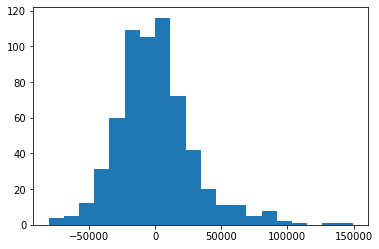

In [14]:
# test residuals
residuals = y_test - y_pred

#plot residuals (Normality Assumption Check)
plt.hist(residuals, bins=20);

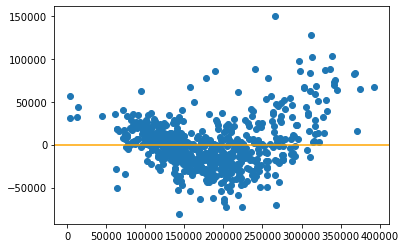

In [15]:
# plot residuals (Linearity and Equal Variance assumption)
plt.scatter(y_pred, residuals)
plt.axhline(0, color = 'orange');

## Recommendations & Improvements

Based off all my analysis I recommend using the Benchmark Model. This model performed the best out of all models and gives the best predictive power. The features included in this model are:
* overall quality 
* house year built 
* house year remod/add 
* masonry vaneer area
* finsished basement sq ft
* total basement sq ft 
* 1st floor sq ft 
* above ground living area 
* number of full bath 
* total rooms above ground
* garage yearr built 
* number of cars garage 
* garage area sq ft.
* bedrooms above ground 
* number offireplaces

Some improvements to consider for this model are using more up to date housing data from the MLS. Next slowly add in important categorical features slowly into the model and test how those addititons impact the model scores. Finally further investigate full bath, garage year built, and number of bedrooms above the ground and see why the model causes these features to have negative impact.